## Part 1: Input the data

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

connect = sqlite3.connect("rmp_database.sqlite")

In [2]:
#integrate SQLite3 with pandas to read info from professors table
professors = pd.read_sql("SELECT * FROM professors;", connect) 

#integrate SQLite3 with pandas to read info from reviews table
reviews = pd.read_sql("SELECT * FROM reviews;", connect) 

## Overview of the data

In [3]:
#have a look the first 10 columns of info from reviews table 
reviews.head(10) 

,prof_id,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,0,08/19/2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel..."
1,1,03/07/2013,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...
2,1,10/14/2011,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...
3,2,09/05/2017,PHIL507,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor..."
4,2,07/17/2017,PHL110E,1.0,4.0,Mandatory,Yes,No,None,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...
5,2,01/16/2010,PHIL200,3.5,4.0,None,None,None,None,None,0,1,No Comments
6,2,07/29/2009,PHL252,5.0,5.0,None,None,None,None,None,5,1,She is an extremely demanding professor. The w...
7,3,01/23/2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...
8,4,07/22/2015,KIN484,5.0,3.0,Mandatory,Yes,None,None,None,0,0,Steph was very helpful and cared about our exp...
9,4,07/22/2015,KIN483,5.0,2.0,Mandatory,Yes,None,None,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.


In [4]:
#get a overview info of the reviews table
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19685 entries, 0 to 19684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prof_id            19685 non-null  int64  
 1   post_date          19672 non-null  object 
 2   name_onlines       19685 non-null  object 
 3   student_star       19672 non-null  float64
 4   student_difficult  19672 non-null  float64
 5   attence            5232 non-null   object 
 6   for_credits        5529 non-null   object 
 7   would_take_agains  3524 non-null   object 
 8   grades             4271 non-null   object 
 9   stu_tags           4975 non-null   object 
 10  help_useful        19685 non-null  int64  
 11  help_not_useful    19685 non-null  int64  
 12  comments           19584 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [5]:
#get a overview of how many missing values in reviews table
reviews.isnull().sum() 

prof_id                  0
post_date               13
name_onlines             0
student_star            13
student_difficult       13
attence              14453
for_credits          14156
would_take_agains    16161
grades               15414
stu_tags             14710
help_useful              0
help_not_useful          0
comments               101
dtype: int64

In [6]:
#check the top 10 colums of info from professors table 
professors.head(10) 

,prof_id,professor_name,gender,age,school_name,department_name,local_name,state_name
0,0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL
1,1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX
2,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT
3,3,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT
4,4,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT
5,5,Lawrence MacDonnell,M,1952.0,St. Francis Xavier University,History department,Antigonish,NS
6,6,David Burke,M,1960.0,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA
7,7,Dana Rush,F,1971.0,Pacific Lutheran University,Physics department,Tacoma,WA
8,8,Angia MacOmber,F,1964.0,Taylor University,Education department,Upland,IN
9,9,Ayumi Gervais,F,2012.0,Grossmont College,Foreign Languages department,El Cajon,CA


In [7]:
#get the overview info from professors table
professors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prof_id          2770 non-null   int64  
 1   professor_name   2770 non-null   object 
 2   gender           2564 non-null   object 
 3   age              2564 non-null   float64
 4   school_name      2770 non-null   object 
 5   department_name  2770 non-null   object 
 6   local_name       2770 non-null   object 
 7   state_name       2770 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 173.2+ KB


In [8]:
#get a overview of how many missing values in professors table
professors.isnull().sum() 

prof_id              0
professor_name       0
gender             206
age                206
school_name          0
department_name      0
local_name           0
state_name           0
dtype: int64

# Part 2: Analysis of data
In this part, the attributes 'Demographics of the Professor' will be focus in below analyis.
Three key research questions need to address:
1. How to define the demographic of the professor?
2. Which factors affect the professors star rating the most?
3. Which kind of professors has higher rating?

In [9]:
#In this research, the demographic of the professor included: Gender and Age. 
#Details analysis of the research will be shown in below.
#Based on the overview of professors and reviews table, two tables need to join together in order to observe the relationships between them.

#query to join the professors and reviews table tgt by the same prof_id
query = "SELECT *\
        FROM professors pro\
        JOIN reviews rev\
        ON pro.prof_id = rev.prof_id;" 

#join two tables tgt
combine = pd.read_sql(query, connect) 

#show top 10 colums of the combine table
combine.head(10) 

,prof_id,professor_name,gender,age,school_name,department_name,local_name,state_name,prof_id,post_date,...,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,0,08/19/2010,...,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel..."
1,1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,1,03/07/2013,...,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...
2,1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,1,10/14/2011,...,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...
3,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,01/16/2010,...,3.5,4.0,None,None,None,None,None,0,1,No Comments
4,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,07/17/2017,...,1.0,4.0,Mandatory,Yes,No,None,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...
5,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,07/29/2009,...,5.0,5.0,None,None,None,None,None,5,1,She is an extremely demanding professor. The w...
6,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,09/05/2017,...,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor..."
7,3,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT,3,01/23/2010,...,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...
8,4,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,4,01/16/2013,...,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul..."
9,4,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,4,01/24/2010,...,1.5,5.0,None,None,None,None,None,0,0,Horrible. I went to class everyday and it stil...


In [10]:
#show the gnereal information of the combine table
combine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19685 entries, 0 to 19684
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prof_id            19685 non-null  int64  
 1   professor_name     19685 non-null  object 
 2   gender             18145 non-null  object 
 3   age                18145 non-null  float64
 4   school_name        19685 non-null  object 
 5   department_name    19685 non-null  object 
 6   local_name         19685 non-null  object 
 7   state_name         19685 non-null  object 
 8   prof_id            19685 non-null  int64  
 9   post_date          19672 non-null  object 
 10  name_onlines       19685 non-null  object 
 11  student_star       19672 non-null  float64
 12  student_difficult  19672 non-null  float64
 13  attence            5232 non-null   object 
 14  for_credits        5529 non-null   object 
 15  would_take_agains  3524 non-null   object 
 16  grades             427

In [11]:
#get a overview of the missing values in combine table
combine.isnull().sum() 

prof_id                  0
professor_name           0
gender                1540
age                   1540
school_name              0
department_name          0
local_name               0
state_name               0
prof_id                  0
post_date               13
name_onlines             0
student_star            13
student_difficult       13
attence              14453
for_credits          14156
would_take_agains    16161
grades               15414
stu_tags             14710
help_useful              0
help_not_useful          0
comments               101
dtype: int64

In [12]:
#Because the prof_id is doubled so i delected and combined two into one 
combine = combine.drop("prof_id", axis=1)
combine['prof_id'] = reviews['prof_id'] 

In [13]:
#overview of the combine table after combined two prof_id tgt
combine.head(10) 

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,08/19/2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel...",0
1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,03/07/2013,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...,1
2,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,10/14/2011,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...,1
3,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,01/16/2010,PHIL200,3.5,4.0,None,None,None,None,None,0,1,No Comments,2
4,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,07/17/2017,PHL110E,1.0,4.0,Mandatory,Yes,No,None,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...,2
5,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,07/29/2009,PHL252,5.0,5.0,None,None,None,None,None,5,1,She is an extremely demanding professor. The w...,2
6,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,09/05/2017,PHIL507,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor...",2
7,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT,01/23/2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/16/2013,HHP226,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
9,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/24/2010,HHP236,1.5,5.0,None,None,None,None,None,0,0,Horrible. I went to class everyday and it stil...,4


In [14]:
#Since i chose the gender, age and post_date as the demographic factors and student_star as the result, so the anlysis of those features in below.
demo = ["age","gender", "student_star", "post_date"]

#check the missing values in particular age,gender and student_star colums in combine table
combine[demo].isnull().sum()

age             1540
gender          1540
student_star      13
post_date         13
dtype: int64

In [15]:
#drop the missing values 
clean = combine.dropna(subset = demo, axis = 0) 

#show the first 10 colums after dropped the values
clean.head(10) 

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,08/19/2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel...",0
1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,03/07/2013,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...,1
2,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,10/14/2011,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...,1
7,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT,01/23/2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/16/2013,HHP226,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
9,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/24/2010,HHP236,1.5,5.0,None,None,None,None,None,0,0,Horrible. I went to class everyday and it stil...,4
10,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,05/06/2010,HHP236,4.5,4.0,None,None,None,None,None,1,0,She was awesome! If you went to class and list...,4
11,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,07/22/2015,KIN483,5.0,2.0,Mandatory,Yes,None,None,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.,4
12,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,07/22/2015,KIN484,5.0,3.0,Mandatory,Yes,None,None,None,0,0,Steph was very helpful and cared about our exp...,4
13,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,08/01/2009,NUTR236,1.5,5.0,None,None,None,None,None,0,0,No Comments,4


In [16]:
#get a overview info of clean data after dropped the missing values of age, gender and student_star
clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18132 entries, 0 to 19684
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   professor_name     18132 non-null  object 
 1   gender             18132 non-null  object 
 2   age                18132 non-null  float64
 3   school_name        18132 non-null  object 
 4   department_name    18132 non-null  object 
 5   local_name         18132 non-null  object 
 6   state_name         18132 non-null  object 
 7   post_date          18132 non-null  object 
 8   name_onlines       18132 non-null  object 
 9   student_star       18132 non-null  float64
 10  student_difficult  18132 non-null  float64
 11  attence            4821 non-null   object 
 12  for_credits        5109 non-null   object 
 13  would_take_agains  3251 non-null   object 
 14  grades             3924 non-null   object 
 15  stu_tags           4587 non-null   object 
 16  help_useful        181

## Part 2.1: Gender
1. The distribution of the professors gneder: more male or female?
2. Whether male professors has higher rating or lower?
3. Any limitation in the analysis?

In [17]:
#After clean the data, count the numbers of male and female 
clean['gender'].value_counts() 

M    9170
F    8962
Name: gender, dtype: int64

In [18]:
#After checked the gender distribution, there is no much different between the numbers of male or females professor, approxiately half half distribution.
#Therefore, i want to check will the student rating affected by the gender of professor. So i did the below analysis:

#check the mean of studnet star according by gender
clean.groupby("gender").mean()['student_star'] 

gender
F    3.756528
M    3.819520
Name: student_star, dtype: float64

In [19]:
#Both mean score is quite similar, it could not see any directly relationship bwtween gender and studnet rating.
#Furthermore, i did a crossover table in student_star and gender in order to have a deeply overview the number of gender in differnt score.

print(pd.crosstab(clean["gender"],clean["student_star"])) 

student_star   1.0  1.5  2.0  2.5  3.0  3.5   4.0   4.5   5.0
gender                                                       
F             1002  383  539  343  543  425  1031  1133  3563
M              866  352  568  348  530  467  1163  1263  3613


In [20]:
#The above table showed that mostly each gender in different score have similars numbers.
#It could not conclude that any specific gneder will realatively get higher or lower marks.
#Since i want to check the correlation and covariance bwtween the gender and student_star,so i transform the dummy encoding below. 

tran = {"M":1, "F":0}
clean["gender"] = clean["gender"].replace(tran) 
print(clean["gender"])

0        1
1        1
2        1
7        0
8        0
        ..
19680    0
19681    0
19682    0
19683    0
19684    0
Name: gender, Length: 18132, dtype: int64


In [21]:
#show the correlation between gender and student_star
clean.corr()["gender"]["student_star"] 

0.022461521195865582

In [22]:
#show the covariance between gender and studnet_star
clean.cov()["gender"]["student_star"] 

0.01574694952073364

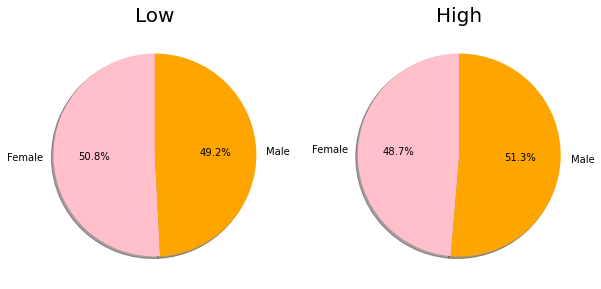

In [23]:
#The above correlation and covariance results are 0.0225 and 0.0157.
#It showed that there is no directly relationships between gender and student_star.
#In order to visualise the data, i plot the pie chart to show the mean score acoording to gender.

mean_rate = clean["student_star"].mean()

low = clean.query("student_star <= @mean_rate")["gender"].value_counts().sort_index()
high = clean.query("student_star >= @mean_rate")["gender"].value_counts().sort_index()

plt.figure(figsize = (10,9))

plt.subplot(1, 2, 1)
plt.pie(low, labels = ["Female", "Male"], colors = ["pink","orange"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("Low", fontsize = 20)

plt.subplot(1, 2, 2)
plt.pie(high, labels = ["Female", "Male"], colors = ["pink", "orange"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("High", fontsize = 20)

plt.show()

In [24]:
#The above pie chart showed that both gender have similar percentage in high and low marks group. 
#The student_star score will not affected by whether the professor is a male or fmeale. 

In [25]:
stats.ttest_ind(clean["student_star"][clean["gender"] == 1],
               clean["student_star"][clean["gender"] == 0])

Ttest_indResult(statistic=3.0251551294933057, pvalue=0.002488537189518353)

- The t-test result showed that a significant difference between student_star and gender

### Conclusion about the gender
- The distribution of gender are likely equal to each others. 
- Based on the analysis showed that there is no direct relationship among gender and student_score. The correlation and covariance is near 0. It means no correlation and they are not linked at all. 
- The pie chart also clearly proved that the percentage of male and female score in low and high are quite similar. 
- Those analysis can conclude that student_star will not directly affected by gender.

## Part 2.2: Age & Post date
1. What is the age distribution among professors?
2. Which age group of professor has higher rating?
3. Any limitaion in this analysis? 

In [26]:
#Overview of the age colums and found out that the data is showing the date of birth of professor

clean["age"].describe() 

count    18132.000000
mean      1972.856773
std         19.654948
min       1916.000000
25%       1958.000000
50%       1966.000000
75%       1987.000000
max       2015.000000
Name: age, dtype: float64

In [27]:
#Overview of age column
clean["age"].head()

0    1956.0
1    2015.0
2    2015.0
7    1952.0
8    1990.0
Name: age, dtype: float64

In [28]:
#Overview of post_date
clean["post_date"].head()

0    08/19/2010
1    03/07/2013
2    10/14/2011
7    01/23/2010
8    01/16/2013
Name: post_date, dtype: object

In [29]:
#Since the post date is showing in d/m/y format and convert to only showing year 
clean["post_date"] = clean["post_date"].astype("datetime64[ns]").dt.year

In [30]:
#Since the data showing the date of birth of tutor,so minus it by the post_date to calcualte professor's age
clean["age"] = clean["post_date"] - clean["age"]

#show the professor's age
clean["age"].head(10) 

0     54.0
1     -2.0
2     -4.0
7     58.0
8     23.0
9     20.0
10    20.0
11    25.0
12    25.0
13    19.0
Name: age, dtype: float64

In [31]:
#get a overview of the data in age
clean["age"].describe() 

count    18132.000000
mean        39.244705
std         19.866477
min        -10.000000
25%         25.000000
50%         45.000000
75%         55.000000
max        100.000000
Name: age, dtype: float64

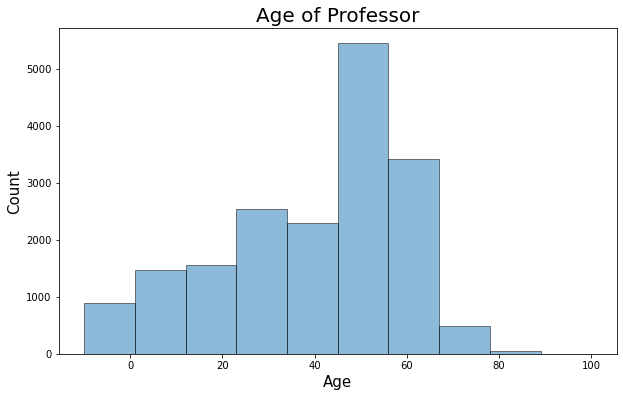

In [32]:
#To plot a histagram to visualise the data in professor's age
plt.figure(figsize=(10,6))
plt.hist(clean["age"], bins = 10, edgecolor = "k", alpha=0.5) 

plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Age of Professor", fontsize = 20)

plt.show()

In [33]:
#From the histagram, we can observe that there may have some error in data like the professor is under 20 and older that 100.
#Therefore, i need to select the correct inforamtion to analyse in next step.

#Only choose the age between 20 to 80 years old, since under 20 is too young not abel to be professor and the number of sample size is too small for over 80
clean = clean.query("age > 20 & age < 80") 
clean.head() 

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,1,54.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel...",0
7,Gyda Swayney,0,58.0,University of Montana - Missoula,Psychology department,Missoula,MT,2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,0,23.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2013,HHP226,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
11,Stephanie Domitrovich,0,25.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN483,5.0,2.0,Mandatory,Yes,None,None,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.,4
12,Stephanie Domitrovich,0,25.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN484,5.0,3.0,Mandatory,Yes,None,None,None,0,0,Steph was very helpful and cared about our exp...,4


In [34]:
#check the correlation between the age and student star
clean.corr()['age']["student_star"] 

-0.06324048920295551

In [35]:
#check the covariance between the age and student star
clean.cov()['age']['student_star'] 

-1.1126033745560466

In [36]:
#After observed the correlation and covariance of the age and student_star, it can conclud that a weak ralationships between them.
#Then, i want to know the age distribution among the professor group so i divided them into 4 groups. 
#Details analysis in below:

clean["age"] = pd.cut(clean['age'], bins = [20,40,60,80], labels = ["Young", "Middle", "Old"]).astype("str")
clean["age"].value_counts().sort_index()

Middle    8374
Old       1785
Young     4362
Name: age, dtype: int64

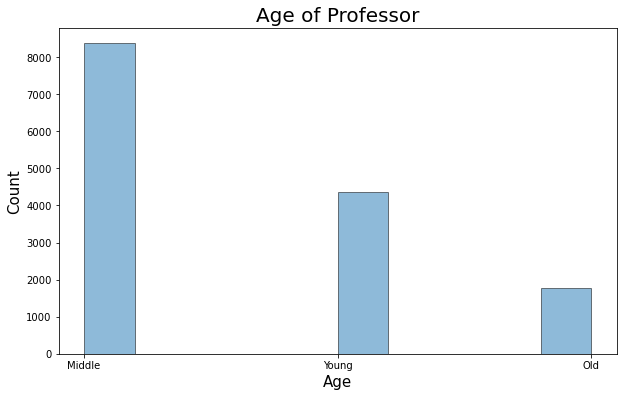

In [37]:
#Plot a histagram to visualise the data in professor age after chose the age bwtween 20 to 100
plt.figure(figsize=(10,6))
plt.hist(clean["age"], bins = 10, edgecolor = "k", alpha=0.5) 

plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Age of Professor", fontsize = 20)

plt.show()

In [38]:
#Based on the above analysis, most of the professor are belong to young age group and followed by middle, young groups.
#Only few of the professor are between 80-100 years old. 

#observe the mean score different between each age group. 
clean.groupby("age").mean()["student_star"] 

age
Middle    3.769047
Old       3.660224
Young     3.907038
Name: student_star, dtype: float64

In [39]:
#The analysis show that the mean score of 20-40 and 40-60 are quite similar. 
#A slightly lower in 60-80 age group 
#It can observe that younger professor tend to have higher marks.

In [40]:
stats.ttest_ind(clean["student_star"][clean["age"] == "Young"],
               clean["student_star"][clean["age"] == "Middle"])

Ttest_indResult(statistic=5.307319040939197, pvalue=1.1311641222865738e-07)

In [41]:
stats.ttest_ind(clean["student_star"][clean["age"] == "Young"],
               clean["student_star"][clean["age"] == "Old"])

Ttest_indResult(statistic=6.401345219859894, pvalue=1.6539602140038963e-10)

In [42]:
stats.ttest_ind(clean["student_star"][clean["age"] == "Middle"],
               clean["student_star"][clean["age"] == "Old"])

Ttest_indResult(statistic=2.9183707624963082, pvalue=0.003526376230582431)

- From the t-test result showed the a significant difference between student_star rating among each age groups(young, middle and old). 

## Reference to previous analysis, we can conclude few main points:
1. 40-60 age group have the most numbers of professors and followed by 20-40, 40-60.
2. There is no correlation between age and student_star since the result of correlation is -0.0632. It can only observe that when the professor get older, it may have a bit marks reduce in the student_star rating.
3. Younger professor tend to have higher mark in student_star rating due to the analysis showed that 20-40 and 40-60 age groups have a higher mean in student rating.

## Limitation in this part:
1. The age under the dataset may not accurate because age is inferred from the professor's name using the agefromname Python package.

## Part 2.3:Age and Gender
After observed the age and gender variable separately, combining two factors together to check any different in marks in a particular age and gender group. 

In [43]:
#chcek the crossover table any different in marks when age and gender combine tgt
mix = pd.crosstab(clean["age"], clean["gender"], clean["student_star"],aggfunc = "mean") 
print(mix) 

gender         0         1
age                       
Middle  3.728961  3.795631
Old     3.634531  3.743468
Young   3.916472  3.893534


In [44]:
#Based on the analysis, it showed that not much different in between gender belong to age 20-40 and 60-80 groups.
#A slighly differnt in 40-60 group, female professors have a bit lower mean score than male.
#Male professor would relatively perform better in 80-100 age group.

#check the numbers of professor in particular age and gender
print(pd.crosstab(clean["age"], clean["gender"]))

gender     0     1
age               
Middle  3339  5035
Old     1364   421
Young   2568  1794


<function matplotlib.pyplot.show(*args, **kw)>

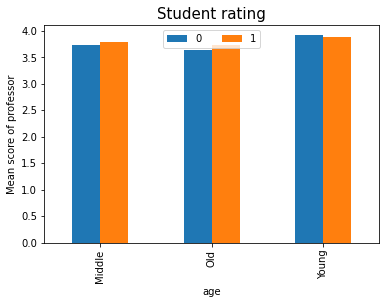

In [45]:
#To visualise the data 
mix.plot(kind="bar")

plt.ylabel("Mean score of professor", fontsize = 10)
plt.title("Student rating", fontsize = 15)
plt.legend(loc='upper center', ncol=3)
plt.show

- Based on the above analysis, there are not mcuh different in mean of student rating in a particular age and gender group. 
- The student_star will not affected by the professor's age and gender. 

# Part 3: Conclusion and Limitions for age and gender

- In conclusion, the demographic of the professors will not affect the Professor ratings too much. Since the above analysis showed that the correlation of age and gender bwtween student_star is so low. 
- Also, gender and age are both inferred from the professor's name using the agefromname Python package. Therefore, it may have some errors exist there.

## 3.1 For credit
- Will the student who took for credit give higher mark in student_rating?

In [46]:
clean["for_credits"].describe()

count     4227
unique       2
top        Yes
freq      4204
Name: for_credits, dtype: object

In [47]:
clean["for_credits"].head(10)

0     None
7     None
8     None
11     Yes
12     Yes
17    None
18    None
19    None
20    None
21     Yes
Name: for_credits, dtype: object

In [48]:
clean["for_credits"].isnull().sum()

10294

In [49]:
# Fill in the missing values
clean["for_credits"].fillna("Unknown", inplace = True)

In [50]:
pd.crosstab(clean["for_credits"], clean["student_star"])

student_star,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
for_credits,,,,,,,,,
No,12,0,0,0,3,0,0,0,8
Unknown,978,503,605,428,549,548,1100,1531,4052
Yes,497,95,274,119,290,166,637,328,1798


- for those studnet who give 5marks in student_star rating, most of them took the class for credits.

In [51]:
#transform the dummy variables
transform = {"Yes":1, "No":0, "Unknown":0}
clean["for_credits"] = clean["for_credits"].replace(transform) 
print(clean["for_credits"])

0        0
7        0
8        0
11       1
12       1
        ..
19680    0
19681    0
19682    1
19683    0
19684    0
Name: for_credits, Length: 14521, dtype: int64


In [52]:
clean.corr()["for_credits"]["student_star"]

-0.0014168648251650846

In [53]:
clean.cov()["for_credits"]["student_star"]

-0.0009020942975529846

In [54]:
stats.ttest_ind(clean["student_star"][clean["for_credits"] == 1],
               clean["student_star"][clean["for_credits"] == 0])

Ttest_indResult(statistic=-0.17072503375599124, pvalue=0.8644423566682637)

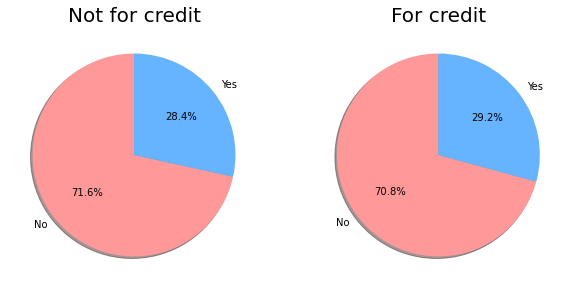

In [55]:
mean_rate1 = clean["student_star"].mean()

not_for_credit = clean.query("student_star <= @mean_rate1")["for_credits"].value_counts().sort_index()
for_credit = clean.query("student_star >= @mean_rate1")["for_credits"].value_counts().sort_index()

plt.figure(figsize = (10,9))

plt.subplot(1, 2, 1)
plt.pie(not_for_credit, labels = ["No", "Yes"], colors = ["#ff9999","#66b3ff"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("Not for credit", fontsize = 20)

plt.subplot(1, 2, 2)
plt.pie(for_credit, labels = ["No", "Yes"], colors = ["#ff9999", "#66b3ff"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("For credit", fontsize = 20)

plt.show()

- From the t-test result, it showed that for_credits is not significant to the student_star rating. 
- The correlation and coviarance show no relationship
- The pie chart show that for_credits does not affect the student_star. 

## 3.2 Would take agains
- Will the students who are willing to take the coursse again that give higher mark for student_star?

In [56]:
clean["would_take_agains"].describe()

count     2684
unique       2
top        Yes
freq      2018
Name: would_take_agains, dtype: object

In [57]:
clean["would_take_agains"].isnull().sum()

11837

In [58]:
clean["would_take_agains"].fillna("Unknown", inplace = True)

In [59]:
clean["would_take_agains"]

0        Unknown
7        Unknown
8        Unknown
11       Unknown
12       Unknown
          ...   
19680    Unknown
19681    Unknown
19682        Yes
19683    Unknown
19684    Unknown
Name: would_take_agains, Length: 14521, dtype: object

In [60]:
pd.crosstab(clean["would_take_agains"], clean["student_star"])

student_star,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
would_take_agains,,,,,,,,,
No,350,0,180,0,109,0,22,0,5
Unknown,1136,598,691,545,658,682,1301,1748,4478
Yes,1,0,8,2,75,32,414,111,1375


- For those who won't take agains, most of the student rating is below 3 and largely in 1.
- For those who would tale agains, most of the student rating is higher or equal to 4. Many of student_star in 5 would take it again.

In [61]:
transform2 = {"No":0, "Unknown":0, "Yes":1}
clean["would_take_agains"]= clean["would_take_agains"].replace(transform2)
clean["would_take_agains"]

0        0
7        0
8        0
11       0
12       0
        ..
19680    0
19681    0
19682    1
19683    0
19684    0
Name: would_take_agains, Length: 14521, dtype: int64

In [62]:
clean.corr()["would_take_agains"]["student_star"]

0.24491742718567508

In [63]:
clean.cov()["would_take_agains"]["student_star"]

0.11893312629965186

In [64]:
stats.ttest_ind(clean["student_star"][clean["would_take_agains"] == 1],
               clean["student_star"][clean["would_take_agains"] == 0])

Ttest_indResult(statistic=30.43831060848312, pvalue=2.5407512929234993e-197)

- Based on the t-test result, it shows that "would_take_agains" is significant affecting in 'student_star"
- The covariance and correlation show that a low positive relationship.